# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
import scipy.stats as stats
import csv

In [2]:
def plotLineAndPoints(l1, l2, l3 = np.array([0,1,0])):
    x_val1 = [x for x, y in l1]
    y_val1 = [y for x, y in l1]
    x_val2 = [x for x, y in l2]
    y_val2 = [y for x, y in l2]
    
    if (np.all(l3 != np.array([0,1,0]))):
        a = l3[0] 
        b = l3[1]
        c = l3[2]
        y_val3_xval1 = []
        y_val3_xval2 = []
        x_val3 = [x_val1, x_val2]
    
        for x in x_val1:
            result = -(a/b)*x - (c/b)
            y_val3_xval1.append(result)
    
        for x in x_val2:
            result = -(a/b)*x - (c/b)
            y_val3_xval2.append(result)
    
        y_val3 = [y_val3_xval1, y_val3_xval2]
    
        plt.plot(x_val1, y_val1, 'r+', x_val2, y_val2, 'bo', x_val3, y_val3,'g')
        plt.xlabel("x axis")
        plt.ylabel("y axis")
        plt.title("Function Graph")
        plt.legend(["points1 ","points2"])
        plt.show()
    else:
        print(x_val1)
        print(y_val1)
        print(x_val2)
        print(y_val2)
        plt.plot(x_val1, y_val1, 'r+', x_val2, y_val2, 'bo')
        plt.xlabel("x axis")
        plt.ylabel("y axis")
        plt.title("Function Graph")
        plt.legend(["points1 ","points2"])
        plt.show()


[[-0.92, 9.71], [-4.52, 7.58], [-8.07, -0.57], [-5.96, 6.18], [-3.16, -0.44], [-7.16, 3.83], [-8.23, 0.15], [-9.69, -4.14], [-8.53, -7.25], [-6.12, 3.61]]
[[6.5, 4.65], [-2.47, -9.02], [7.99, -7.63], [6.94, 9.25], [-1.97, -9.18], [2.96, -5.0], [4.62, 8.91], [4.69, -4.09], [9.68, 6.58], [-0.34, -5.2]]


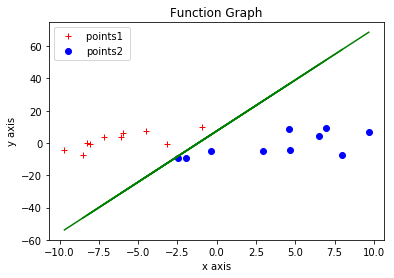

In [20]:
 
def generate_dataset(k0, k1):
    
    list1 = []
    list2 = []
    theta = []
    y = []
    d = 2
    for i in range(d+1):
        theta.append(round(random.uniform(-10,10),2))
    theta = np.array(theta)
    #print(list3)
#     a = b = c = 0
#     while a == 0:
#         a = random.randrange(-10,10)
#     while b == 0:
#         b = random.randrange(-10,10)
#     while c == 0:
#         c = random.randrange(-10,10)
    
#     list3 = (a,b,c)
    
    
    while (k0 > 0):
#         x = random.randrange(-10,10)
#         y = random.randrange(-10,10)
        random_list = [round(random.uniform(-10,10),2) for i in range(d)] + [1]
        result1 = np.sum(random_list * theta)
        if result1 < 0:
            list1.append(random_list[0:d])
            y.append(-1)
            k0 = k0 - 1
    while(k1 > 0):
#         x = random.randrange(-10,10)
#         y = random.randrange(-10,10)
        random_list = [round(random.uniform(-10,10),2) for i in range(d)] + [1]
        result2 = np.sum(random_list * theta)
        if result2 > 0:
            list2.append(random_list[0:d])
            y.append(1)
            k1 = k1 - 1
    print(list1)
    print(list2)
    X = np.array(list1 +list2)
    y = np.array(y)
    if d == 2:
        plotLineAndPoints(list1, list2, theta)
    else:
        print("Program can only plot for d = 2")
        
#     list1 = np.array(list1)
#     list2 = np.array(list2)
    return X,y

    
X,y = generate_dataset(10,10) 
#print(list3)
#plotLineAndPoints(list1, list2, list3)


            
            
        
        
        
        
  
    

### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





[-3.72713399 -1.89673758  8.47533784]
[[-7, 8], [-2, 4], [-4, 9], [6, -2], [8, -4], [5, 1], [-6, 9], [5, 1], [8, -2], [1, 0]]
[[2, -7], [-8, -1], [-4, -10], [-9, -8], [-5, 0], [-4, -6], [-8, 1], [8, -5], [-1, -4], [-10, 0]]
[6.103262422731516, 9.475337842599501, -4.7271339949685895]


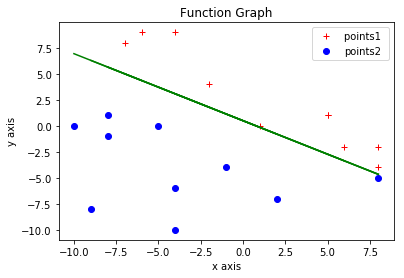

In [46]:
def fit(X, y):
    d = len(X[0]) #length of the 0th row
    w = np.random.uniform(-10,10,d) #w is generated between -10 and 10 and till legth of the X matrix row X=[x1,x2,x3,...]
    print(w)
    
    #calulating classified value w_t*x*y > 0 for y = [1,-1]
    for idx, x in enumerate(X):
        x.append(y[idx]) #appending y in the matrix 
    
    random.shuffle(X)
    y = []
    for x in X:
        y.append(x.pop()) #popping out the y elemnt which we stored as the last element
        
    idx = 0 #index taking as a counter
    while idx < len(X):
        pred = np.dot(w, X[idx])
        if y[idx] * pred > 0:
            idx += 1
        else:
            w = w + np.multiply(y[idx], X[idx]) #formula w_t = w +x*y
            idx = 0
    
    line = []
    for i in range(1, w.shape[0]):
        line.append(w[i])
    line.append(w[0])
    list1 = [[x[1], x[2]] for idx, x in enumerate(X) if y[idx] == 1]
    list2 = [[x[1], x[2]] for idx, x in enumerate(X) if y[idx] == -1]
    print(list1)
    print(list2)
    print(line)
    plotLineAndPoints(list1, list2, line)
    pass

x_list = [[1, x1, x2] for x1, x2 in list1]  #creating a new list [1,x1,x2] taking elemnts from list 1 x1 and x2 anf fixing x0 = 1
x_list.extend([[1, x1, x2] for x1, x2 in list2]) #extending the list and adding elemnts from list2
x = np.array(x_list)
y = [1]*10
y.extend([-1]*10)

fit(x_list,y)
# print(list3)

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

In [47]:
the above algorithm is the perceptron learning algorithm and it is a linear classifier.
If our data is separable by a hyperplane, then the perceptron will always converge. It will never converge if the data is not 
linearly separable. 

SyntaxError: invalid syntax (<ipython-input-47-a85b2d25f5dd>, line 1)

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

In [ ]:
when the data is not linearly seperable that is not seperable with one line then we can't solve this using the above perceptron
algorithm which we are using,Because if the problem itself is not linearly seperable we can't use this kind of algorithm. This 
may happen because we do not have enough information and we need more information if we want to perform a better job. So in 
this what we can do is we can increase the power of the class of fucntion by artifically expanding it's set of features and hence
the corresponding number of paramters. For example we can take it to higher dimension and then we can seperate the data or 
classify the data, This is one of the approach we can take. we can add more parameters to it, to increase it's ability to seperate
the data, which enables us to learn more complex relationship to the target variable.


## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

In [4]:
def feature_normalization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma #normalizing
    print(X_norm)

    return X_norm, mu, sigma

In [5]:
def cost_function(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    m = y.size
    y_predict = np.dot(X, theta)
    cost = 0
    cost = cost + np.sum((1/(2*m))*(np.square(y_predict - y))) #cost function formula
    print(cost)
    return cost

In [6]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
#       '''
#       Implement gradient descent for a single gradient step on the parameter 
#       vector theta. Save the result of each iteration on J_history.
#       '''
        y_predict = np.dot(theta,np.transpose(X))
        theta = theta - (learning_rate)*(1/m)*np.dot(np.transpose(X),(y_predict - y))
        J_history[i] = cost_function(X, y, theta)

    return theta, J_history

In [7]:
def linearRegression_ols(X, y):
    '''
    Implement the closed-form (or ordinary least squares) solution for
    linear regression. Save the result in the variable 'theta'.
    More information can be found at: 
      https://en.wikipedia.org/wiki/Ordinary_least_squares
    '''
    theta = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)),np.dot(np.transpose(X),y))
    

    return theta

In [8]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.keys())
print(dataset.data.shape)
print(dataset.feature_names)
#print(dataset.DESCR)
X = dataset.data #dataset of the boston data
y = dataset.target #price value of the boston ouse
m = y.size
print(m)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
506


In [9]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization(X)
m = y.size
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...
[[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Running gradient descent ...
274.8025870285184
256.2482728103458
239.7662706307063
224.9115017150383
211.37256225230038
198.92802300304265
187.4172536157572
176.72092926868257
166.74799256539876
157.4269200351426
148.69985990652094
140.518685840351
132.84232985871733
125.63496999342902
118.86478964955784
112.5031199629502
106.52383926729232
100.90294566716764
95.61824662938207
90.64912811420842
85.97637817551296
81.58204823270356
77.44934073667278
73.56251563507854
69.90681050163099
66.46837083752253
63.23418815264487
60.19204417098625
57.33045999936272
54.63864943190099
52.10647578811346
49.72441183575641
47.483502454788066
45.37532977155021
43.391980543395164
41.52601561045018
39.77044125778337
38.11868235106949
36.56455712406698
35.1022535082252
33.726306904497676
32.43157930558522
31.21323968380524
30.066745565878804
28.987825721346944
27.97246389621374
27.016883527865723
26.11753338140567
25.271074051315498
24.474365275868365
23.7244540149725
23.01856324517274
22.354081428381335
2

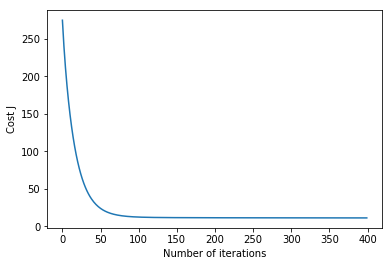

In [10]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(14)
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [11]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target

X = np.c_[np.ones(m), X] # Add intercept term to X

theta = linearRegression_ols(X, y)

# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [12]:
def feature_normalization_regularization(X):
    '''
    In this function we are going to do something similar to what we did in A0, 
    we are going to normalize all the features. Implement the following steps:
    
    - for each feature, calculate its mean
    - substract the mean from their respective feature
    - save the above result in the 'mu' variable
    
    - for each feature, calculate its standard deviation
    - divide each feature by its standard deviation
    - save the above result in the 'sigma' variable
    
    '''
  
    n = X.shape[1]
    X_norm = X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma #normalizing
    print(X_norm)

    return X_norm, mu, sigma

In [13]:
def cost_function_regularization(X, y, theta):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
  
    #m = y.size
    #cost = 0
    m = y.size
    y_predict = np.dot(X, theta)
    theta_adjust = theta[1:]
    lamda = 0.3
    cost = 0
    cost = cost + np.sum((1/(2*m))*(np.square(y_predict - y))) + lamda*np.sum(np.square(theta_adjust)) #cost function formula
    print(cost)
    return cost

    return cost

In [14]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    print(theta.shape)
    lamda = np.array(0.3)
    #print(theta.shape)
    for i in range(0, num_iters):
#       '''
#       Implement gradient descent for a single gradient step on the parameter 
#       vector theta. Save the result of each iteration on J_history.
#       ''
        x_zero = X[0:,0:1]
        
        y_predict = np.dot(theta,np.transpose(X))
        rate = (1 - (learning_rate*lamda)/m)
        theta[0] = theta[0] - (learning_rate)*(1/m)*np.dot(X[:,0],(y_predict - y))
        theta[1:] = theta[1:]*rate - (learning_rate)*(1/m)*np.dot(np.transpose(X[:,1:14]),(y_predict - y))
        print(theta.shape)
        J_history[i] = cost_function_regularization(X, y, theta)

    return theta, J_history

In [15]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target

In [16]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalization_regularization(X)
m = y.size
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...
[[-0.41771335  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41137448 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Running gradient descent ...
(14,)
(14,)
274.86395873192225
(14,)
256.4559041102439
(14,)
240.16482718450533
(14,)
225.52127786009612
(14,)
212.19955098635452
(14,)
199.9702293079795
(14,)
188.66858182731133
(14,)
178.17351649243273
(14,)
168.3935572754371
(14,)
159.25749543451423
(14,)
150.70815047926445
(14,)
142.6981996128752
(14,)
135.18738284034862
(14,)
128.14062289204432
(14,)
121.52675351106241
(14,)
115.31765240160051
(14,)
109.48764349264343
(14,)
104.0130786330496
(14,)
98.8720390565853
(14,)
94.04411703727558
(14,)
89.51025149138458
(14,)
85.25260013237143
(14,)
81.25443665348556
(14,)
77.50006530016152
(14,)
73.97474776682827
(14,)
70.66463905288006
(14,)
67.55673003458647
(14,)
64.63879524909362
(14,)
61.89934487310873
(14,)
59.327580198400774
(14,)
56.913352115882816
(14,)
54.64712225747754
(14,)
52.51992653511466
(14,)
50.523340875489524
(14,)
48.64944898842512
(14,)
46.890812032909885
(14,)
45.24044006275492
(14,)
43.691765146338824
(14,)
42.23861606402989
(14,)
40.875

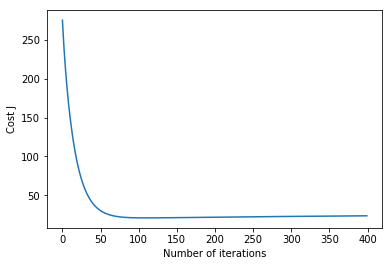

In [17]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(14)
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

[[ 0.  0.  0. -1. -2.]
 [-0. -2. -1.  0. -0.]
 [-1. -0.  1. -3.  0.]
 ...
 [ 1.  0. -1. -1.  1.]
 [-0. -0. -0. -1.  0.]
 [ 0. -1.  1.  0. -1.]]
83.96968230103336
79.06194246148887
74.44629154756704
70.10534154970375
66.022739811838
62.18310736704244
58.571980946735486
55.17575844456883
51.98164762913231
48.97761791188794
46.15235498828358
43.49521818084689
40.9962003232642
38.64589003404411
36.43543623738889
34.356514797382275
32.40129713958156
30.56242074160594
28.83296138136945
27.20640703824276
25.676633348668382
24.23788052362218
22.884731640832722
21.612092229859275
20.415171073010058
19.289462149671085
18.230727655932405
17.23498203545659
16.29847696135144
15.417687212397896
14.589297390359423
13.810189428273418
13.077430842610005
12.388263684990875
11.740094151800315
11.130482812503313
10.557135419820082
10.017894267101576
9.510730060315563
9.03373427399385
8.585111962317594
8.163174998234403
7.766335715115746
7.393100926981774
7.042066304748632
6.711911087296338
6.4013931074181

Text(0,0.5,'Cost of J')

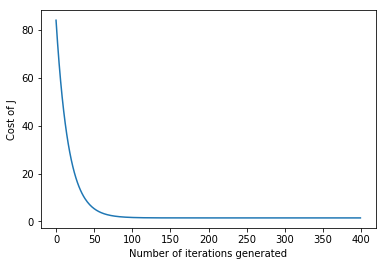

In [47]:
## Code for function 1
data_file=open('data1.csv','r')
data=np.array(list((csv.reader(data_file))))
data_file.close()

X=np.array(data[:,:5])
y=np.array(data[:,5])
X=X.astype(np.float) #giveing a specified type 
y=y.astype(np.float)
X=np.round(X)
print(X)
y=np.round(y)

#Normalizing the data input before gradient descent
m=y.size
mu = np.mean(X,axis=0) #calulating the mean
sigma = np.std(X,axis=0) #calculating the standard deviation
X_norm=((X-mu)/sigma) #normalizing formula
X_norm = np.c_[np.ones(m), X_norm]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html


#taking the balue of alpha 
alpha = 0.03
num_iters = 400

# using formula for gradient descent
theta = np.zeros(X_norm.shape[1]) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html
theta, J_history = gradient_descent(X_norm, y, theta, alpha, num_iters) #passing it to gradient descent function

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations generated')
plt.ylabel('Cost of J')
            
    
    
    


### Methodology and answer for function 2

In [39]:
## Code for function 2
import csv
data2_file = open("data2.csv","r")
data2 = np.array(list((csv.reader(data2_file))))
data2_file.close()

y = data2[:, 5]
X = data2[:,0:5]

X = X.astype(np.float)
y = y.astype(np.float)

X_round = np.round(X)
y_round = np.round(y)

pow_x1 = list(range(0,4))
pow_x2 = list(range(0,4))
pow_x3 = list(range(0,4))
pow_x4 = list(range(0,4))
pow_x5=  list(range(0,4))

equation_terms = []
X_equation = []

for power_x1 in pow_x1:
    for power_x2 in pow_x2:
        for power_x3 in pow_x3:
            for power_x4 in pow_x4:
                for power_x5 in pow_x5:
                    equation_terms.append('x_1'+str(power_x1)+'*'+'x_2^'+str(power_x2)+'*'+'x_3^'+str(power_x3)+'*'+'x_4^'+
                                         str(power_x4)+'*'+'x_5^'+str(power_x5))
                    temp = []
                    for x in X:
                        temp.append((x[0]**power_x1)*(x[1]**power_x2)*(x[2]**power_x3)*(x[3]**power_x4)*(x[4]**power_x5))
                    X_equation.append(temp)
                    
equation_terms = np.array(equation_terms)
X_equation = np.array(X_equation)
X_equation = np.transpose(X_equation)


X_equation = np.array(X_equation)
X_equation = X_equation[:,1:]




In [40]:
#Normalizing features
m = y_round.size
X_equation_normalized, mu, sigma = feature_normalization_regularization(X_equation)
X_equation_normalized = np.c_[np.ones(m),X_equation_normalized]

alpha = 0.01
num_iters = 400

theta = np.zeros(X_equation_normalized.shape[1])
np.seterr(divide = 'ignore', invalid = 'ignore')
theta, J_history = gradient_descent_regularization(X_equation_normalized, y_round, theta, alpha, num_iters)

print(y.size)

plt.figure()
plt.plot(np.arrange(J_history.size), J_history)
plt.xlabel('number of iteration')
plt.ylabel('cost j')
print('Theta computed '.format(theta))

[[-1.23909178  0.41518775 -0.45968966 ...  0.03986251 -0.04174817
   0.0283549 ]
 [ 0.72145066 -0.35841687  0.106949   ...  0.04007833 -0.04199508
   0.02859226]
 [-0.60717667 -0.41792354 -0.03497488 ...  0.04008921 -0.04199393
   0.02859556]
 ...
 [ 1.24441489  0.33828288  0.46162717 ...  0.04008243 -0.04199355
   0.02859221]
 [ 1.1213195   0.14006919  0.34250397 ...  0.04008451 -0.04199135
   0.02859429]
 [-0.7195681  -0.31034666 -0.07345449 ...  0.05936966 -0.05443402
   0.03580864]]
(1024,)


ValueError: operands could not be broadcast together with shapes (1023,) (13,) 